# Phase 4 Code Challenge Review



In [4]:
from src.student_caller import one_random_student
from src.student_list import quanggang 

%load_ext autoreload
%autoreload 2

TOC:

  - [Time Series](#ts)  

  - [Clustering](#clust)
    

<a id='ts'></a>

# Time Series

In [6]:
import pandas as pd
import numpy as np

In [7]:
ap = pd.read_csv('data/AirPassengers.csv')

With the data above, what is the first step in transforming it into data suitable for our time series models?

> Your answer here

In [8]:
# Perform that step in code

In [9]:
#__SOLUTION__
ap.set_index(pd.to_datetime(ap['Month'], format = '%Y-%m'), inplace=True)
ap.drop('Month', axis = 1, inplace=True)

What types of trends might we expect to find in our time series datasets?

In [10]:
# plot the time series

<AxesSubplot:xlabel='Month'>

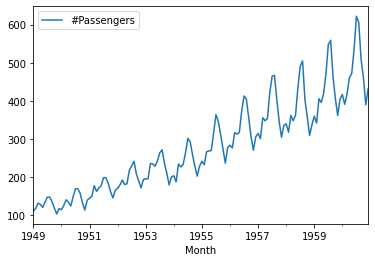

In [11]:
#__SOLUTION__
ap.plot()

What type of trends do you see in the above plot?

> Your answer here

In [12]:
# Add to the plot to visualize trends by looking at summary statistics across a window of time.

<AxesSubplot:xlabel='Month'>

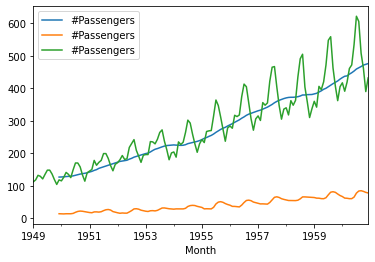

In [105]:
#__SOLUTION__
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ap.rolling(12).mean().plot(ax=ax)
ap.rolling(12).std().plot(ax=ax)
ap.plot(ax=ax)

What are some ways to remove those trends? 

<AxesSubplot:xlabel='Month'>

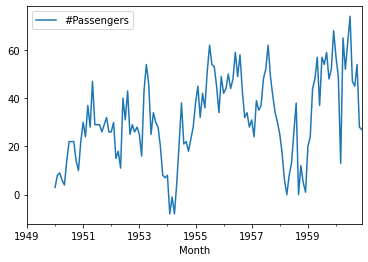

In [14]:
#__SOLUTION__
fig, ax = plt.subplots()
ap.diff(12).plot(ax=ax)



What is the goal of removing those trends?

> Your answer here

How can we diagnose whether we have successfully removed the trends?

> Your answer here

Use the Augmented Dickey Fuller test to see if the detrended data is ready for modeling

In [130]:
# your code here

In [131]:
#__SOLUTION__
from statsmodels.tsa.stattools import adfuller

adfuller(ap.diff(12).dropna())

(-3.383020726492481,
 0.011551493085514952,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.527129208137)

How can ACF/PACF plots below help us pick our model coefficients?

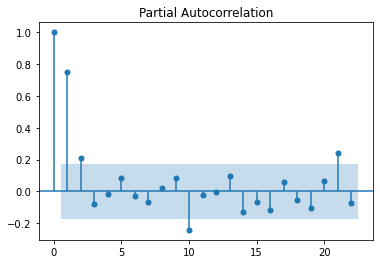

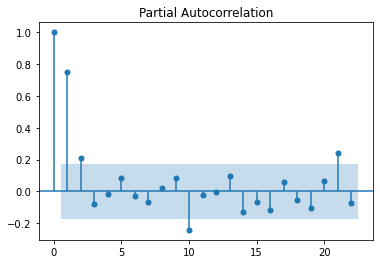

In [107]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ap.diff(12).dropna())

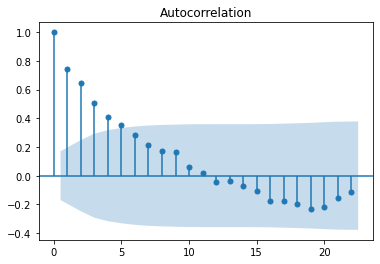

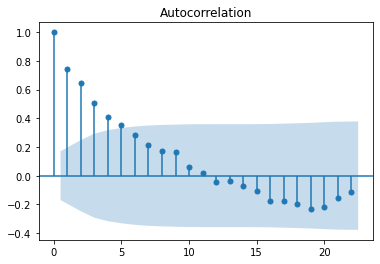

In [108]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ap.diff(12).dropna())


Let's look at another dataset with a smaller time unit.

In [109]:
aq = pd.read_csv('data/AirQualityUCI.csv', delimiter=';')
aq.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [110]:
# Explain what this gnarly bit of code doing? 
aq['date_time'] = pd.to_datetime(aq['Date'] + ' ' + aq['Time'], format='%d/%m/%Y %H.%M.%S')
aq.set_index('date_time', inplace=True)

Which of the features are possible candidates for time series modeling?

> Your answer here

<AxesSubplot:xlabel='date_time'>

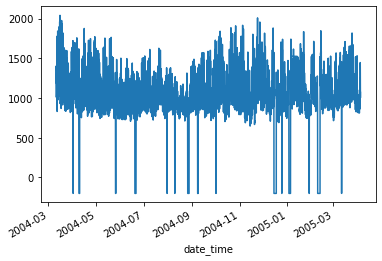

In [111]:
aq['PT08.S1(CO)'].plot()

What's going on here? Reference the [docs](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

In [122]:

aq_replaced = np.where(aq['PT08.S1(CO)'] ==-200, np.nan, aq['PT08.S1(CO)'])
aq_replaced = pd.Series(aq_replaced, index=aq.index)

What techniques do we have to fill the nan's in our data?

Use one of the techniques mentioned above to fill the data.

In [ ]:
# Your code here

Let's look at the daily levels of PT08.S1(CO)

In [ ]:
# Your code here

<AxesSubplot:xlabel='date_time'>

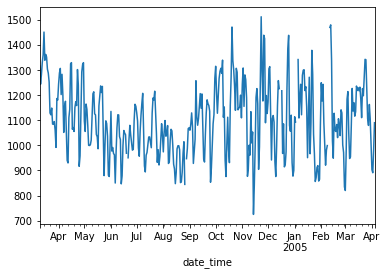

In [113]:
# resample to the day
aq_replaced.resample('D').mean().plot()

Plot the pacf and acf's for the resampled data.  Use it to identify the AR/MA components.

In [ ]:
# Your code here

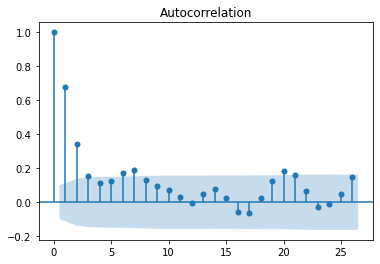

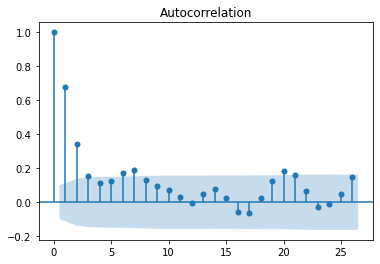

In [127]:
#__SOLUTION__
plot_acf(aq_replaced.resample('D').mean().dropna())

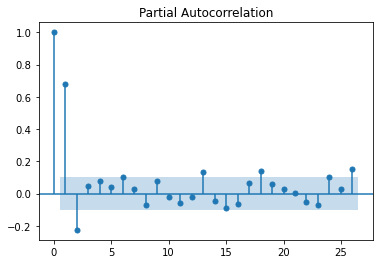

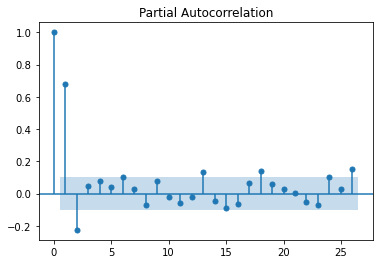

In [132]:
#__SOLUTION__
plot_pacf(aq_replaced.resample('D').mean().dropna())

<a id='pca'></a>

<a id='clust'></a>

# Clustering

Question: What is the difference between supervised and unsupervised learning?

> Your answer here

Describe how the KMeans algorithm works.

Be sure to mention initialization and how it updates.


> Your answer here

How does KMeans know how many clusters to make?

> Your answer here

How does KMeans assess the best clusters?  Look at the doc-string if you need to.

> Your answer here

In [133]:
from sklearn.cluster import KMeans

KMeans()

KMeans()

## Agglomerative Clustering

In [134]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering()


Describe how Heirarchical Agglomerative Clustering works.

Be sure to mention how it inititializes, and how clusters are formed.

> Your answer here

What are linkages? Explain how the default linakage works in the model. 

> Your answer here

How does heirarchical aglomerative clustering decide how many clusters to make?

What metrics do we have to score the clusters which are formed?

> Your answer here

Describe the difference between them.

> Your answer here

Let's code together. For the iris dataset loaded below, implement a heirarchical agglomerative clusterer with the appropriate fitting technique with a simple train-test-split.

Choose the appropriate ammount of clusters based on an appropriate metric. 

Bonus: Use PCA to visualize in two dimensions the cluster groups of the best metric.

In [136]:
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])
y = data['target']

In [81]:
#__SOLUTION__
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [83]:
#__SOLUTION__
ss = StandardScaler()
X_tr_sc = ss.fit_transform(X_train)

silhouette = []
for _ in range(2,10):
    
    agg = AgglomerativeClustering(_)
    agg.fit(X_tr_sc)
    silhouette.append(silhouette_score(X_tr_sc, agg.labels_))
    

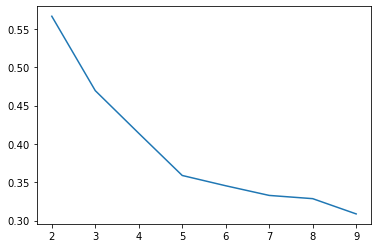

In [91]:
#__SOLUTION__
fig, ax = plt.subplots()
ax.plot(range(2,10), silhouette)

/Users/johnmaxbarry/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


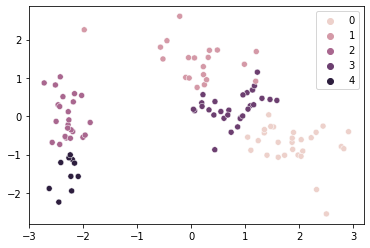

In [93]:
#__SOLUTION__
from sklearn.decomposition import PCA
import seaborn as sns
agg = AgglomerativeClustering(5)
agg.fit(X_tr_sc)

pca = PCA(n_components=2)
X_tr_pca_2 = pca.fit_transform(X_tr_sc)

fig, ax = plt.subplots()

sns.scatterplot(X_tr_pca_2[:,0], X_tr_pca_2[:,1], hue=agg.labels_);